## Importações e Informações do dataset

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/covid_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

Primeiros registros do dataset:



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Pré-processamento

In [11]:
# Tratamento de valores faltantes (se necessário)
data = data.dropna()

# Remoção de atributos qualitativos
quantitative_columns = data.select_dtypes(include=[np.number]).columns
data = data[quantitative_columns]

# Amostragem do dataset para evitar estouro de memória
# Ajuste o valor conforme necessário
#  data_sampled = data.sample(n=2000, random_state=42)
# Tava perdendo acurácia

# Separação entre atributos (X) e rótulos (y)
X = data_sampled.drop(columns=['CLASIFFICATION_FINAL'])
y = data_sampled['CLASIFFICATION_FINAL']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Redução da dimensionalidade usando PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Gaussian Naive Bayes (padrão)


Matriz de Confusão:


[[  0   0   0   0   0   0   3]
 [  0   0   0   0   0   0   0]
 [  6  11   2  22   2   1 114]
 [  0   0   0   0   0   0   0]
 [  1   0   0   2   1   0   8]
 [  1   0   0   4   5   0  35]
 [ 11   6   1  24   3   0 137]]

Relatório de Classificação:


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         0
           3       0.67      0.01      0.02       158
           4       0.00      0.00      0.00         0
           5       0.09      0.08      0.09        12
           6       0.00      0.00      0.00        45
           7       0.46      0.75      0.57       182

    accuracy                           0.35       400
   macro avg       0.17      0.12      0.10       400
weighted avg       0.48      0.35      0.27       400


Acurácia:
0.35


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


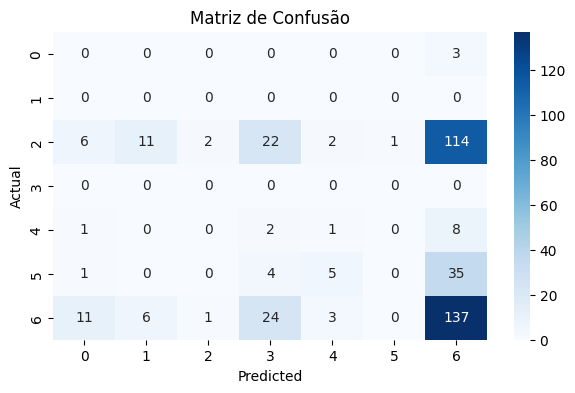

In [12]:
# Criação e treinamento do classificador Gaussian Naive Bayes
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:\n\n")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()